Unlike the classical copying algorithm where we can transfer the information from one memory to another one, in case of Qbits if we copy like that it means we are explicitly taking a mesurement and it loses the information. To achieve this in Qbits we need to use entaglement, where one Qbit gets in entanglment with the one which need to copy and shows the same information in both the Qbits. Panic mode !!!

In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [12]:
# circuit with 3 quantum bits and 3 classical bits
circuit = QuantumCircuit(3,3)

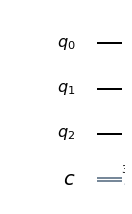

In [13]:
circuit.draw(output='mpl')

applying X gate to Q[0]. X is a quvivalent of classical NOT gate

In [14]:
circuit.x(0)
circuit.barrier()

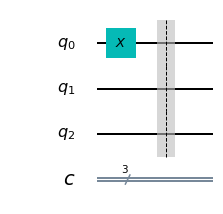

In [15]:
circuit.draw(output='mpl')

In [16]:
circuit.h(1)
circuit.cx(1,2)

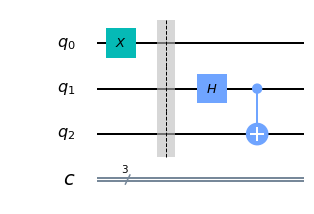

In [17]:
circuit.draw(output='mpl')

In [18]:
circuit.cx(0,1)
circuit.h(0)

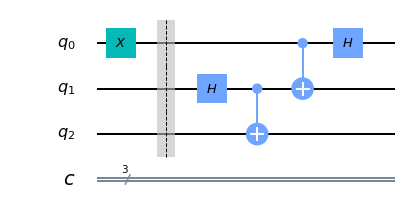

In [19]:
circuit.draw(output='mpl')

In [20]:
circuit.barrier()
circuit.measure([0,1],[0,1])

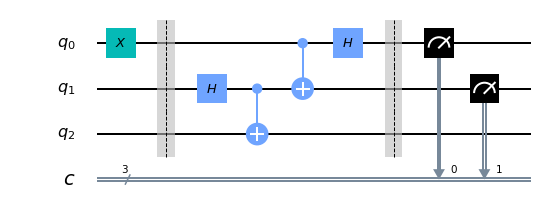

In [21]:
circuit.draw(output='mpl')

In [22]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)

In [28]:
circuit.measure(2,2)

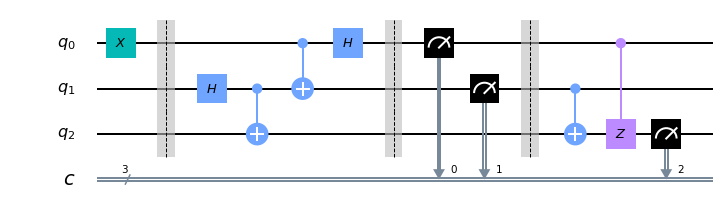

In [29]:
circuit.draw(output='mpl')

In [30]:
simulator = Aer.get_backend('qasm_simulator')

In [31]:
result = execute(circuit, backend=simulator,shots = 1024).result()

In [32]:
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector

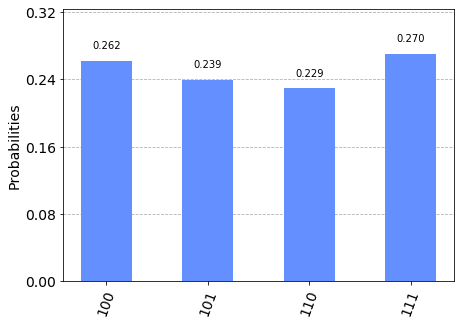

In [33]:
plot_histogram(result.get_counts(circuit))

In [34]:
IBMQ.load_account()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [35]:
provide = IBMQ.get_provider('ibm-q')

In [36]:
qcom = provide.get_backend('ibmq_16_melbourne')

In [37]:
job = execute(circuit,backend= qcom)

In [38]:
from qiskit.tools import job_monitor

In [39]:
job_monitor(job)

Job Status: job incurred error     


In [40]:
plot_histogram(job.result().get_counts(circuit))

IBMQJobFailureError: 'Unable to retrieve job result. Job has failed. Use job.error_message() to get more details.'